In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt

In [3]:
raw_data = pd.read_csv("nyc_taxi_trip_duration.csv")

In [4]:
raw_data.head(5)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


#### Findings:

1. There are no missing values
2. Date and time are together. we can seprate them for further analysis

## UNIVARIATE ANALYSIS

In [7]:
raw_data['pickup_datetime'] = pd.to_datetime(raw_data['pickup_datetime'])
raw_data['dropoff_datetime'] = pd.to_datetime(raw_data['dropoff_datetime'])

In [8]:
raw_data['pickup_date'] = raw_data['pickup_datetime'].dt.date
raw_data['pickup_time'] = raw_data['pickup_datetime'].dt.time
raw_data['dropoff_date'] = raw_data['pickup_datetime'].dt.date
raw_data['dropoff_time'] = raw_data['pickup_datetime'].dt.time
raw_data['month'] = raw_data['pickup_datetime'].dt.month
raw_data['weekday'] = raw_data['pickup_datetime'].dt.day_name()
raw_data['demand_hour'] = raw_data['pickup_datetime'].dt.hour

In [9]:
raw_data = raw_data.drop(columns=['pickup_datetime', 'dropoff_datetime', 'id'])

In [10]:
weekday_to_number = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

raw_data['weekday'] = raw_data['weekday'].map(weekday_to_number)

In [11]:
raw_data[['passenger_count', 'trip_duration']].describe()

,passenger_count,trip_duration
count,729322.000000,7.293220e+05
mean,1.662055,9.522291e+02
std,1.312446,3.864626e+03
min,0.000000,1.000000e+00
25%,1.000000,3.970000e+02
50%,1.000000,6.630000e+02
75%,2.000000,1.075000e+03
max,9.000000,1.939736e+06


Text(0, 0.5, 'Frequency')

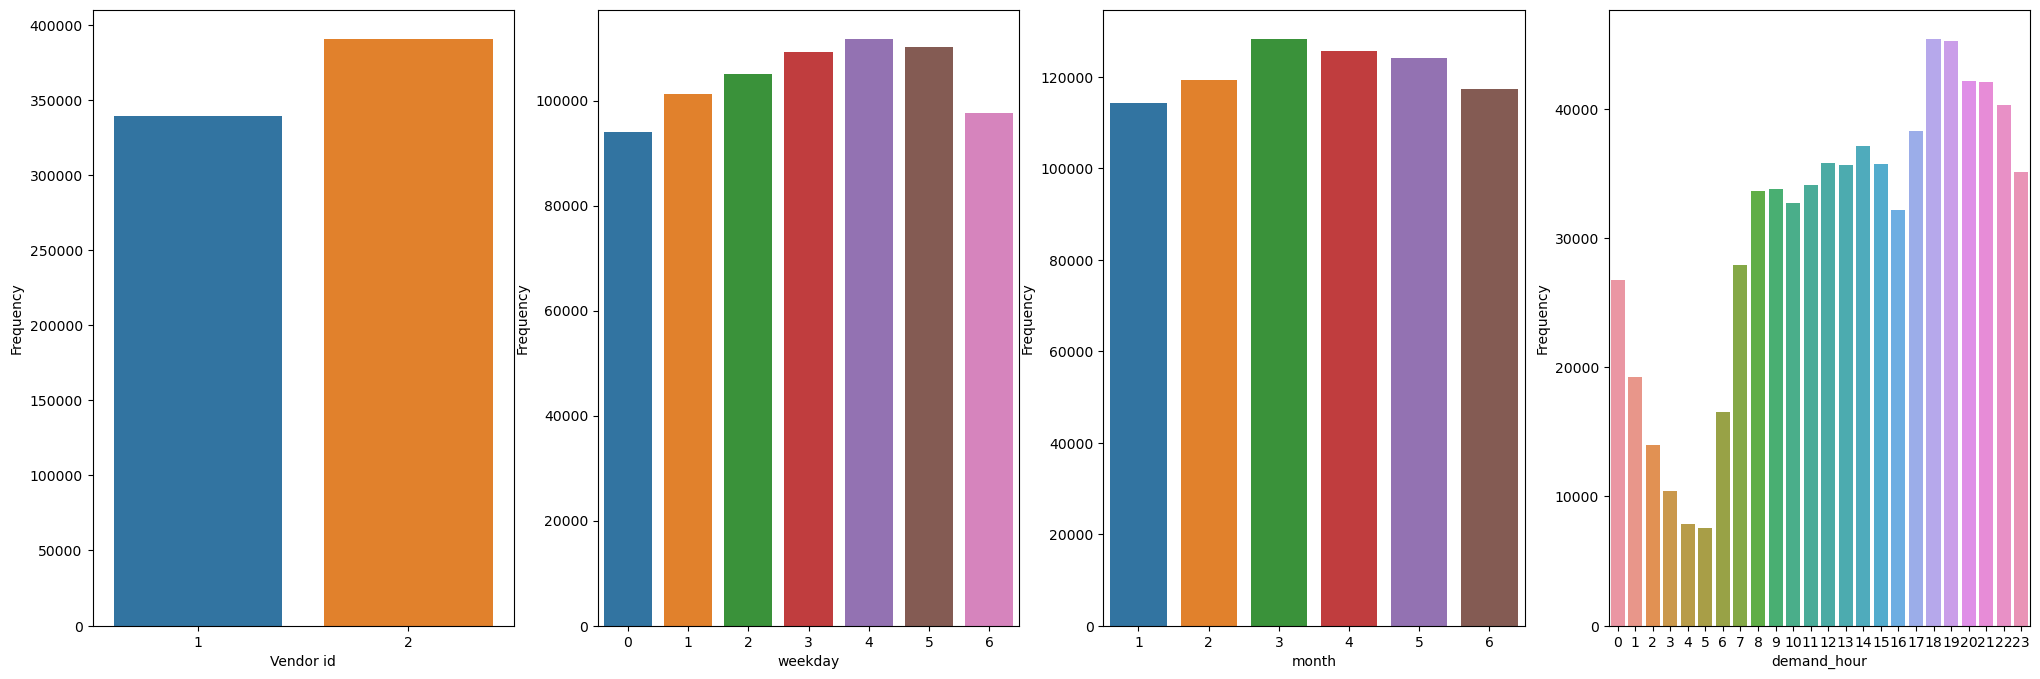

In [12]:
plt.figure(figsize=(25,8))

plt.subplot(141)
sns.countplot(x='vendor_id', data=raw_data)
plt.xlabel('Vendor id')
plt.ylabel('Frequency')
plt.subplot(142)
sns.countplot(x='weekday', data=raw_data)
plt.xlabel('weekday')
plt.ylabel('Frequency')
plt.subplot(143)
sns.countplot(x='month', data=raw_data)
plt.xlabel('month')
plt.ylabel('Frequency')
plt.subplot(144)
sns.countplot(x='demand_hour', data=raw_data)
plt.xlabel('demand_hour')
plt.ylabel('Frequency')

#### Findings:

1. We find that freq of vendor 1 and 2 are approximately same.
2. Freq is max for the friday
3. Most of the bookings were done in the month of march.
4. The demand is more in day time and maximizes during eveneing

In [13]:
raw_data['log_trip_duration'] = np.log(raw_data['trip_duration'])

<Axes: xlabel='log_trip_duration', ylabel='Count'>

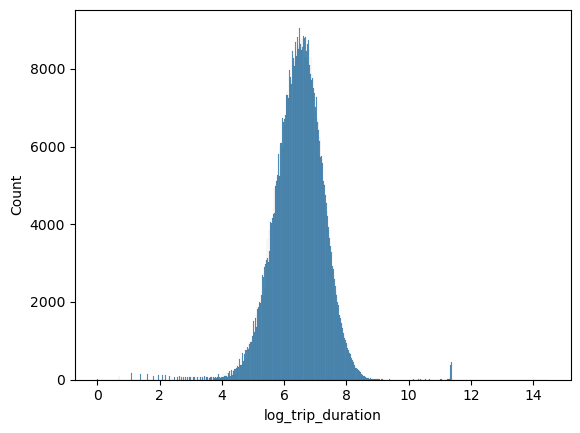

In [14]:
sns.histplot(raw_data['log_trip_duration'])

<Axes: xlabel='pickup_longitude', ylabel='Count'>

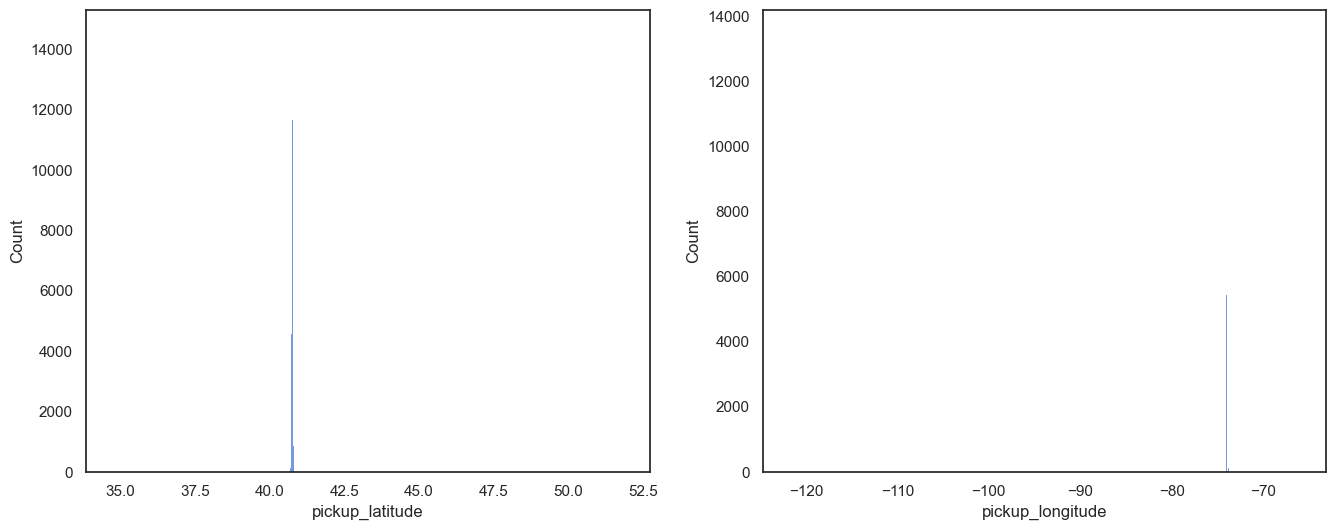

In [15]:
sns.set(style="white", palette="muted")
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(raw_data['pickup_latitude'])
plt.subplot(1,2,2)
sns.histplot(raw_data['pickup_longitude'])

<Axes: xlabel='dropoff_longitude', ylabel='Count'>

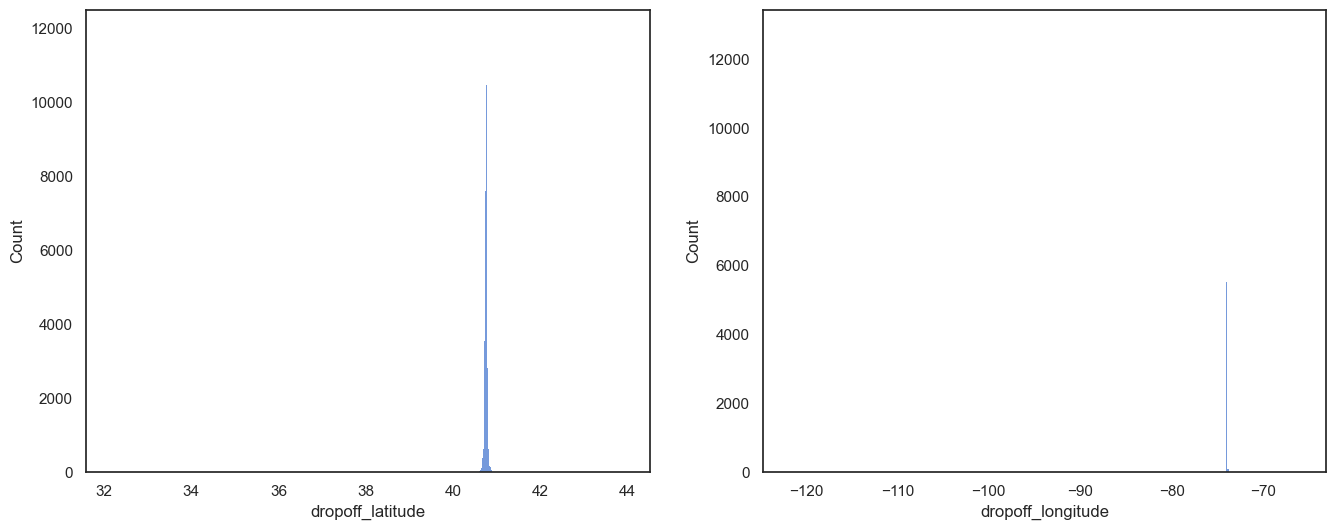

In [16]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(raw_data['dropoff_latitude'])
plt.subplot(1,2,2)
sns.histplot(raw_data['dropoff_longitude'])


#### Findings:

1. We can not that pickup and dropoff latitudes and longitudes are close with few outliers. we can remove the outliers to clearly se the distributions.

In [29]:
df_temp = raw_data[(raw_data['pickup_latitude']>40.5)&(raw_data['pickup_latitude']<41)]
df_temp2 = raw_data[(raw_data['pickup_longitude']>-74.5)&(raw_data['pickup_longitude']<-73.5)]

<Axes: xlabel='pickup_longitude', ylabel='Count'>

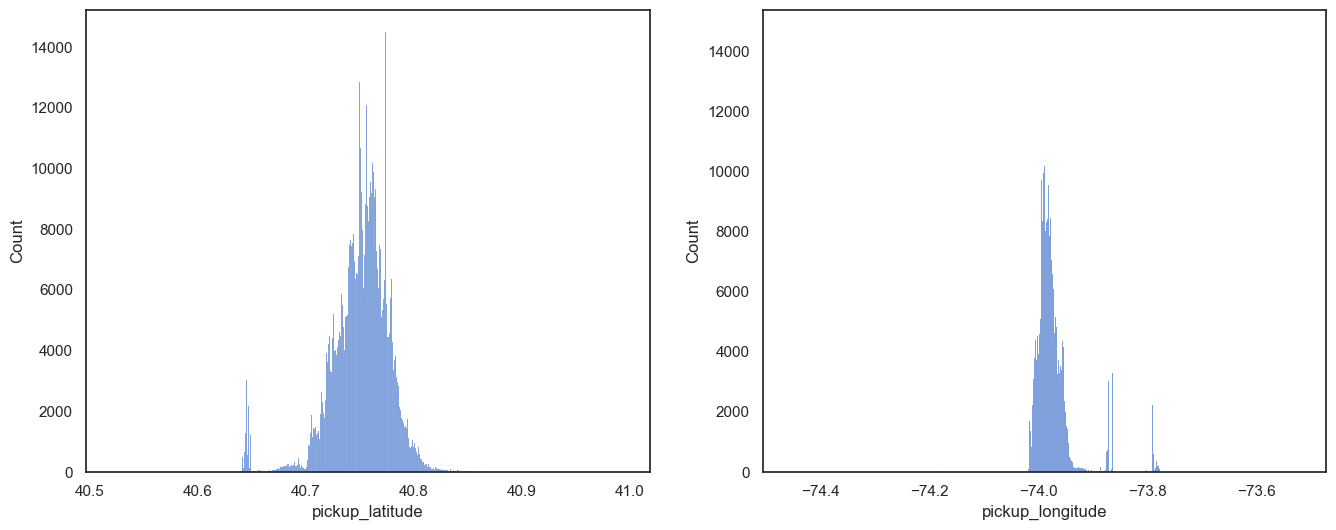

In [30]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(df_temp['pickup_latitude'])
plt.subplot(1,2,2)
sns.histplot(df_temp2['pickup_longitude'])

In [34]:
df_temp = raw_data[(raw_data['dropoff_latitude']>40.5)&(raw_data['dropoff_latitude']<41)]
df_temp2 = raw_data[(raw_data['dropoff_longitude']>-74.5)&(raw_data['dropoff_longitude']<-73.5)]

<Axes: xlabel='dropoff_longitude', ylabel='Count'>

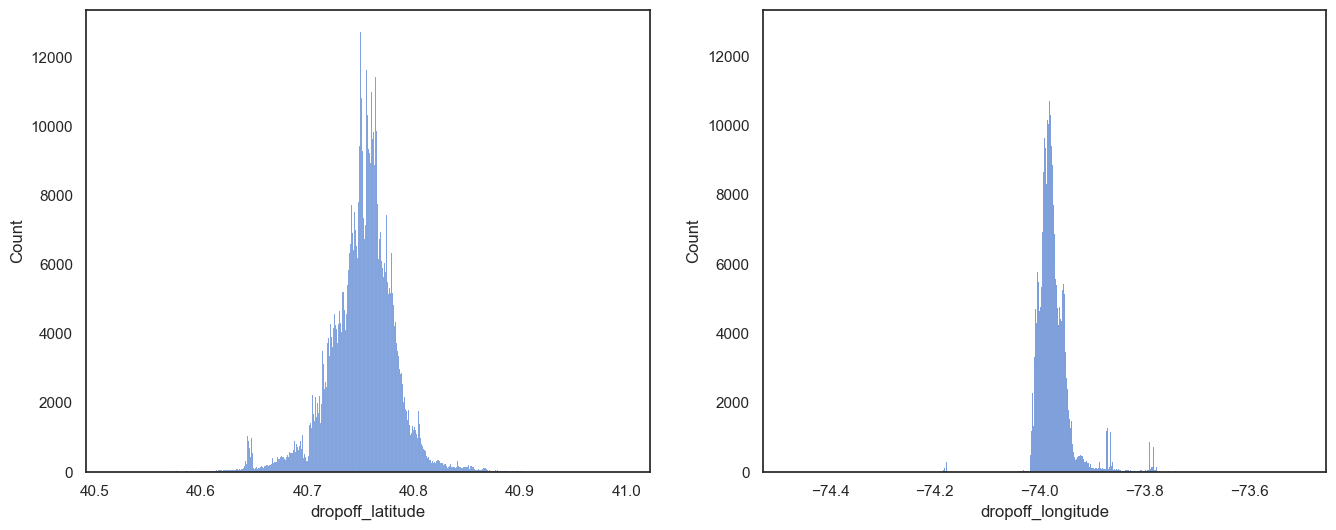

In [35]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(df_temp['dropoff_latitude'])
plt.subplot(1,2,2)
sns.histplot(df_temp2['dropoff_longitude'])

## BIVARIATE ANALYSIS

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

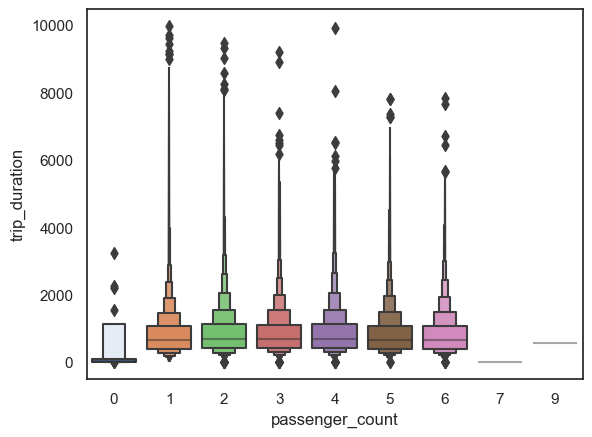

In [40]:
sns.boxenplot(x='passenger_count', y='trip_duration',data=raw_data[raw_data['trip_duration']<10000])

#### Findings:
1. We are confirming the hypotheseis that the mean of Trip duration is independent for 1 to 6 number of passengers. There are very less number of trips for passengers > 7 

<Axes: xlabel='store_and_fwd_flag', ylabel='trip_duration'>

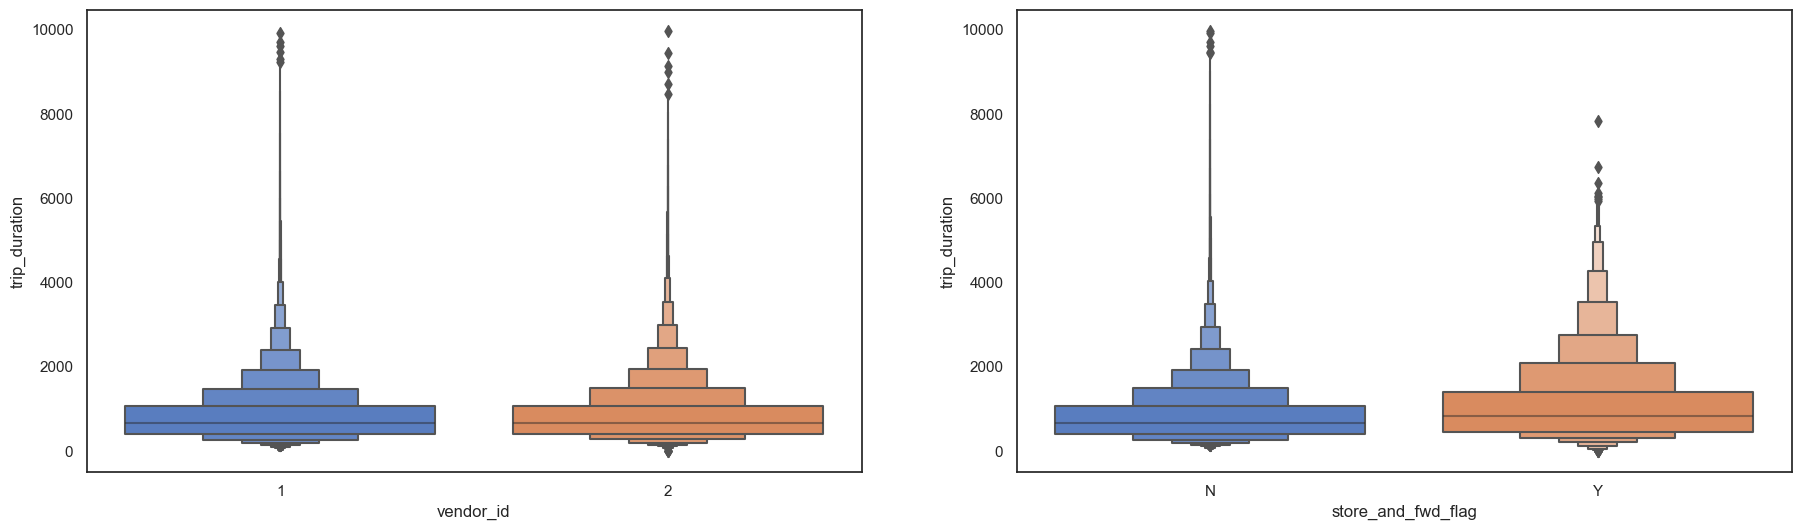

In [42]:
plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.boxenplot(x='vendor_id', y='trip_duration',data=raw_data[raw_data['trip_duration']<10000])

plt.subplot(1,2,2)
sns.boxenplot(x='store_and_fwd_flag', y='trip_duration',data=raw_data[raw_data['trip_duration']<10000])

#### Findings:
1. We are confirming the hypothesis that the mean of Trip duration is independent of vendor id and store and fwd flag

In [68]:
def haversine(raw_data):
    R=6371
    dlat = np.radians(raw_data['dropoff_latitude']) - np.radians(raw_data['pickup_latitude'])
    dlong = np.radians(raw_data['dropoff_longitude']) - np.radians(raw_data['pickup_longitude'])
    
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(raw_data['pickup_latitude'])) * np.cos(np.radians(raw_data['dropoff_latitude'])) * np.sin(dlong / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    raw_data['distance'] = R*c
    return raw_data

In [84]:
raw_data = haversine(raw_data)

In [85]:
raw_data.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_time', 'dropoff_date',
       'dropoff_time', 'month', 'weekday', 'demand_hour', 'log_trip_duration',
       'distance'],
      dtype='object')

In [86]:
new_df = raw_data[['passenger_count','log_trip_duration','distance', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]

<Axes: >

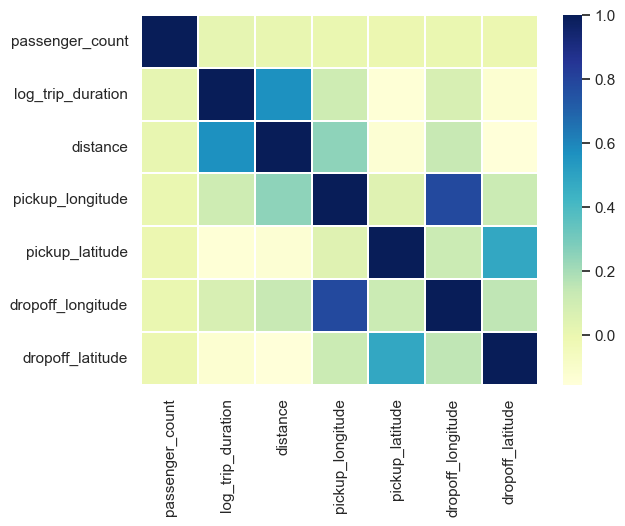

In [87]:
corr = new_df.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

In [1]:
git --version

NameError: name 'git' is not defined